# Topic Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Raw Data

First let's look at some of the raw data we know is mostly financial text.

In [2]:
# One of the datasets labelled both by human classifiers and chat-gpt
fin_df = pd.read_csv('../../data/classified-data/financial_phrasebank.csv')
fin_df = fin_df[['Headlines','Manual Sentiment', 'GPT Sentiment', 'Topic']]
fin_df.head()

,Headlines,Manual Sentiment,GPT Sentiment,Topic
0,Besides we have increased the share of meat in...,Positive,Neutral,Other
1,Both operating profit and net sales for the 12...,Positive,Positive,Economics
2,Both operating profit and net sales for the 12...,Positive,Positive,Economics
3,Both operating profit and net sales for the 12...,Positive,Positive,Economics
4,Both operating profit and net sales for the 12...,Positive,Positive,Economics


In [3]:
fin_df['Topic'].value_counts() / len(fin_df)

Economics    0.84544
Other        0.15456
Name: Topic, dtype: float64

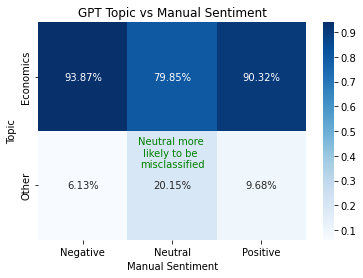

In [4]:
confusion_matrix = fin_df.groupby(['Topic', 'Manual Sentiment']).size().unstack(fill_value=0)
confusion_matrix = confusion_matrix / confusion_matrix.sum()

sns.heatmap(confusion_matrix, annot=True, fmt='.2%', cmap='Blues')
plt.title('GPT Topic vs Manual Sentiment')
plt.text(0.5, 0.4, 'Neutral more \nlikely to be \nmisclassified', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=10, color='g')
plt.show()

In [5]:
neu_oth = fin_df[(fin_df['Manual Sentiment'] == 'Neutral') & (fin_df['Topic'] == 'Other')]
neu_oth = neu_oth['Headlines'].sample(10).values.tolist()

print('\033[1m' + 'Human sentiment: Neutral, GPT topic: Other' + '\033[0m')
for row in neu_oth:
    print(f'  "{row}"')

Human sentiment: Neutral, GPT topic: Other
  "Founded in 1985, Quatrocon's clientele consists of public sector builders, central trading companies and major construction firms."
  "Today, we are connecting people in new and different ways - fusing advanced mobile technology with personalized services to enable people to stay close to what matters to them."
  "In April 2010, Olvi's range of ciders will expand with a strawberry-rhubarb and an apple-pear cider in green bottles with a new shape."
  "Rapala Fishing Frenzy 2009."
  "In his current position, Manty has worked since 1996."
  "ALEXANDRIA, Va., Dec. 22 -- United States Patent no. 7,854,608, issued on Dec. 21, was assigned to Outotec Oyj ( Espoo, Finland )."
  "Most recently, he founded Virent Energy Systems, Inc., an 80 person catalytic biofuels company, where, as president and CEO, he led the company through multiple financings, defined the company's market strategy, and secured the company's first customers."
  "An of the inven

Let us also look at some data we know aren't financial text.

In [6]:
non_fin_df = pd.read_csv('../../data/classified-data/ag-news-classification-dataset.csv')
non_fin_df = non_fin_df[non_fin_df['Manual Topic'] == 'Sports']
non_fin_df = non_fin_df[['Headlines','GPT Sentiment', 'Topic']]
non_fin_df.head()

,Headlines,GPT Sentiment,Topic
22,Veterans Committee counts for little,Negative,Other
31,Today in Athens,Neutral,Other
33,Greek sprinters quit Games,Negative,Other
38,Owners Seek Best Ballpark Deal for Expos,Neutral,Economics
39,Crowd Inspires Greek Beach Volleyballers; U.S....,Negative,Other


In [7]:
non_fin_df['Topic'].value_counts() / len(non_fin_df)

Other        0.95163
Economics    0.04837
Name: Topic, dtype: float64

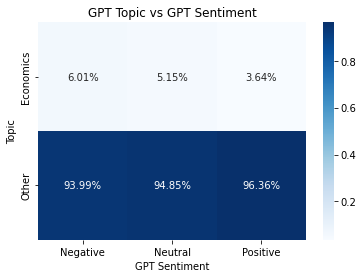

In [8]:
confusion_matrix = non_fin_df.groupby(['Topic', 'GPT Sentiment']).size().unstack(fill_value=0)
confusion_matrix = confusion_matrix / confusion_matrix.sum()

sns.heatmap(confusion_matrix, annot=True, fmt='.2%', cmap='Blues')
plt.title('GPT Topic vs GPT Sentiment')
plt.show()

In [9]:
print('\033[1m' + 'GPT topic: Economics' + '\033[0m')
for row in non_fin_df[non_fin_df['Topic'] == 'Economics']['Headlines'].sample(10).values.tolist():
    print(f'  "{row}"')

GPT topic: Economics
  "NHL on Ice, Maybe for Whole 2004-05 Season "
  "Button Must Stay With BAR!"
  "Losing hits veterans the hardest"
  "ATP chief says players to blame for burnout"
  "Transactions"
  "Deutsche Bank Says It #39;s Not in Talks With Glazer, Denies Report"
  "Memphis Signs Gasol to Multi-Year Deal "
  "Glazer ups United stake again"
  "Federer Seals Year-End No. 1 Spot Three Months Early"
  "O #39;Neill tries to lower expectations"


### Findings

ChatGPT seems to effectively identify the topic of a given text. 
- In the Financial Phrasebank dataset, many examples categorized as 'Other' do not resemble economic content, suggesting that the reported 84.5% accuracy may be somewhat deceptive. 
- Meanwhile, the error rate for the AG-News dataset subset labeled as 'Sports' is quite low, with 95% of the instances being accurately classified.

## Test set

In [10]:
# Check test set classifications
test = pd.read_csv('../../data/fixed-data/topic-test.csv')

test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25708 entries, 0 to 25707
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headlines  25708 non-null  object
 1   Topic      25708 non-null  object
dtypes: object(2)
memory usage: 401.8+ KB


,Headlines,Topic
count,25708,25708
unique,25708,2
top,bale wants premier league return after further...,Other
freq,1,21029


In [11]:
print(test.tail(10)[['Headlines', 'Topic']])

                                               Headlines      Topic
25698  obama attacks trump s worldview in front of gr...      Other
25699  will new climate regulations destroy the econo...      Other
25700  us consumer confidence falls as election race ...  Economics
25701  biden to unveil plan to offer legal status for...      Other
25702  credit to domestic economy stands at n14trn, s...  Economics
25703                  gardner s fake schedule conflict?      Other
25704  jury sides with led zeppelin in stairway to he...      Other
25705  the moon and venus will come together in the n...      Other
25706                 why you should drink cheap whiskey      Other
25707  the sims 4 will get new skin tones, fix others...      Other


In [12]:
# Class distribution
print(test.groupby('Topic')['Headlines'].count() / len(test))

Topic
Economics    0.182006
Other        0.817994
Name: Headlines, dtype: float64


## Train set

In [13]:
train = pd.read_csv('../../data/fixed-data/topic-train.csv')
val = pd.read_csv('../../data/fixed-data/topic-val.csv')
train = pd.concat([train, val], ignore_index=True)
print(train.groupby('Topic')['Headlines'].count() / len(train))

Topic
Economics    0.185975
Other        0.814023
Name: Headlines, dtype: float64


We're working with an imbalanced dataset.

In [14]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640521 entries, 0 to 640520
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Headlines  640520 non-null  object
 1   Topic      640521 non-null  object
dtypes: object(2)
memory usage: 9.8+ MB


,Headlines,Topic
count,640520,640521
unique,640519,2
top,grace,Other
freq,2,521400


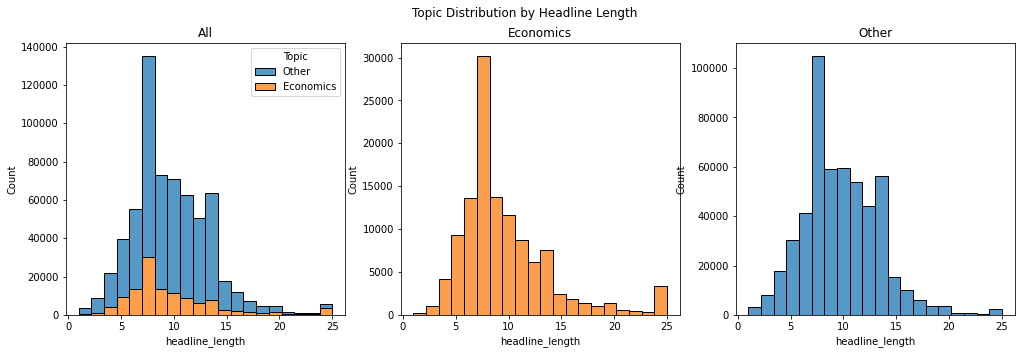

In [15]:
train['Headlines'] = train['Headlines'].astype(str)
train['headline_length'] = train['Headlines'].apply(lambda x: min(len(x.split()), 25))

fig, axes = plt.subplots(ncols=3, figsize=(17, 5))
sns.histplot(data=train, x='headline_length', hue='Topic', multiple='stack',
             bins=20, ax=axes[0])
economics = train[train['Topic'] == 'Economics']
other = train[train['Topic'] != 'Economics']

sns.histplot(data=economics, x='headline_length', color='#f97d11', multiple='stack',
             bins=20, ax=axes[1])
sns.histplot(data=other, x='headline_length', multiple='stack',
             bins=20, ax=axes[2])

fig.suptitle('Topic Distribution by Headline Length')
axes[0].set_title('All')
axes[1].set_title('Economics') 
axes[2].set_title('Other')
plt.show()

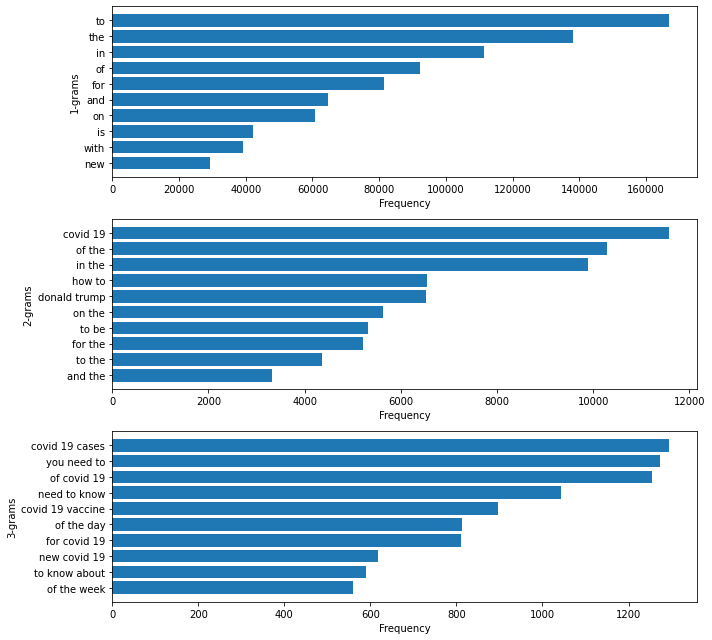

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


def get_ngrams(corpus, ngrams=1, relative=False):
    """Get all n-grams from a corpus of text.
    
    Args:
        corpus: A list of strings representing the text documents.
        ngrams: The size of the n-grams to be extracted (default: 1).
        relative: If True, returns relative frequencies (default: False).
    
    Returns:
        A tuple containing two lists: n-gram words and their corresponding frequencies.
    """
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words, frequencies = zip(*words_freq)
    if relative:
        frequencies = frequencies / np.sum(frequencies)
    return words, frequencies


def plot_top_ngrams(ax, corpus, ngrams=1, top_k=10):
    """Plot the top k n-grams from a corpus of text."""
    words, frequencies = get_ngrams(corpus, ngrams=ngrams)
    words, frequencies = words[:top_k], frequencies[:top_k]
    ax.barh(words, frequencies)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_ylabel(f'{ngrams}-grams')


fig, axes = plt.subplots(3, 1, figsize=(10, 9))
plot_top_ngrams(axes[0], train['Headlines'], ngrams=1)
plot_top_ngrams(axes[1], train['Headlines'], ngrams=2)
plot_top_ngrams(axes[2], train['Headlines'], ngrams=3)
plt.tight_layout()
plt.show()

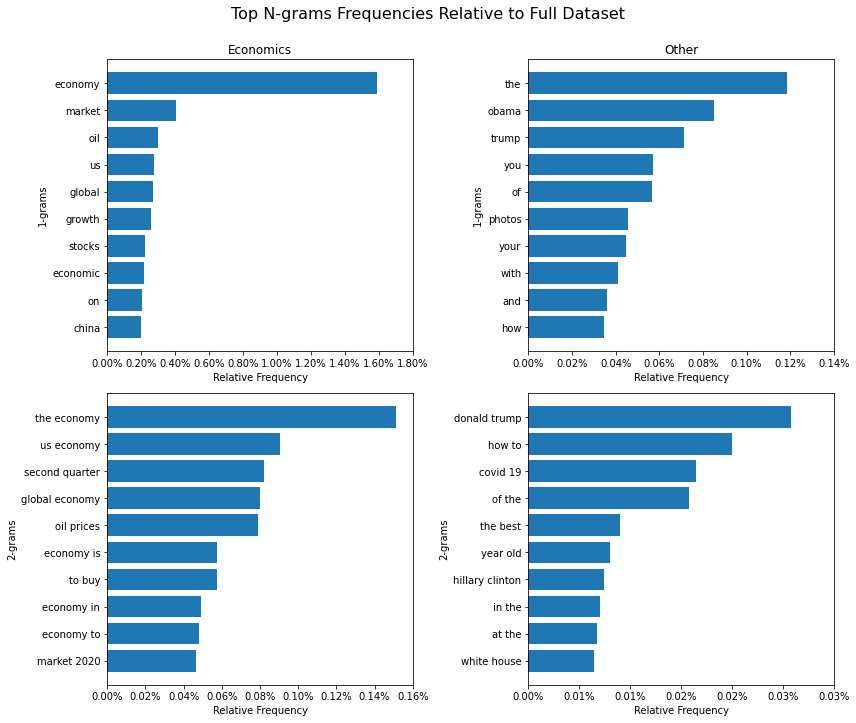

In [17]:
def plot_top_ngrams_relative(ax, corpus, total_counts, ngrams=1, top_k=10):
    """ Plot the top k n-grams relative to the total dataset for a given corpus.
    
    I.e. if 'bull' is 0.2% of the total dataset and 0.6% of the corpus, then the relative
    frequency of 'bull' is 0.6 - 0.2 = 0.4 %.
    
    Args:
        ax: A matplotlib axes object for plotting.
        corpus: A list of strings representing the text documents.
        total_counts: A dictionary containing the total counts of n-grams for all topics.
        ngrams: The size of the n-grams to be extracted (default: 1).
        top_k: The number of top n-grams to display (default: 10).
    """
    word_freq = get_ngrams(corpus, ngrams=ngrams, relative=True)
    relative_word_freq = [(w, f - total_counts[w]) for w, f in zip(*word_freq)]
    words_freq = sorted(relative_word_freq, key=lambda x: x[1], reverse=True)[:top_k]
    words, relative_frequencies = zip(*words_freq)

    ax.barh(words, relative_frequencies)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Frequency')
    ax.set_ylabel(f'{ngrams}-grams')
    # Set x-axis to percentage
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels(['{:,.2%}'.format(x) for x in xticks])


total_1ngrams = get_ngrams(train['Headlines'], ngrams=1, relative=True)
total_1ngrams = dict(zip(*total_1ngrams))
total_2ngrams = get_ngrams(train['Headlines'], ngrams=2, relative=True)
total_2ngrams = dict(zip(*total_2ngrams))

topics = ['Economics', 'Other']
num_topics = len(topics)
fig, axes = plt.subplots(2, num_topics, figsize=(6 * num_topics, 10))

for col, topic in enumerate(topics):
    headlines = train[train['Topic'] == topic]['Headlines']
    axes[0, col].set_title(topic)
    plot_top_ngrams_relative(axes[0, col], headlines, total_counts=total_1ngrams, ngrams=1)
    plot_top_ngrams_relative(axes[1, col], headlines, total_counts=total_2ngrams, ngrams=2)

fig.suptitle('Top N-grams Frequencies Relative to Full Dataset', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

## Key Findings

After analyzing the dataset, the following key findings have emerged:

- The dataset is imbalanced, with `Other` having significantly more headlines than `Economics`. 
    - One potential solution is to optimize a loss function that takes this into account (I.e. Class weighting). 
    - Alternatively, the `Economics` headlines could be repeated until the dataset is balanced.
- While the frequency of `covid-19` n-grams is still high, it has decreased compared to the previous version of the dataset.
- The sentence length distributions of the two topics are somewhat different, but this difference has significantly decreased compared to the previous dataset.

Overall, the quality of the dataset has improved compared to the previous iteration and is now suitable for training models.

### Earlier Findings

<span style="color: #999999">*This section contains the findings from the previous version of the dataset.*</span>

- The dataset is imbalanced.
    - Either optimize a loss function that takes this into account
    - Or repeat `Economics` headlines until the dataset is balanced.
- The amount of `covid-19` n-grams should be looked into. It means that the COVID-era headlines dominates dataset, which might not represent normal news coverage. 
- The two topics have a very different sentence length distributions.

Overall, the dataset quality should be improved before starting training models.
